In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

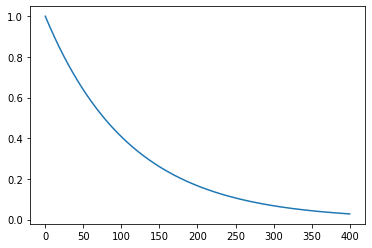

In [2]:
# let's consider radioactive decay
x = np.linspace(0,400.0,1000) # let's get data points for 200 days
y = np.exp(-x/111.3) # 111.3 days is the lifetime of Co 56
pl.plot(x,y)

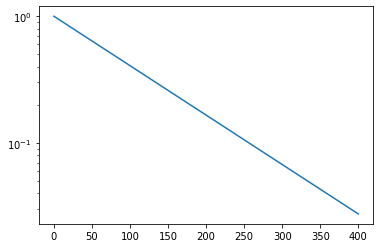

In [3]:
# now, let's plot it on a log x axis:
pl.semilogy(x,y)

(0.025, 1.0)

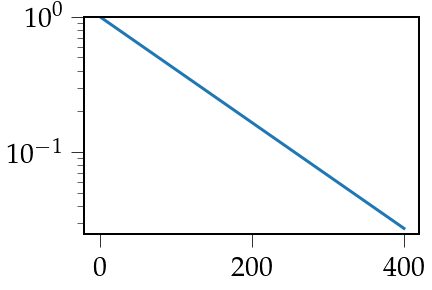

In [5]:
# now let's make it look nice!
from plot_defaults import *
pl.semilogy(x,y)
pl.ylim(0.025,1.0)



findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


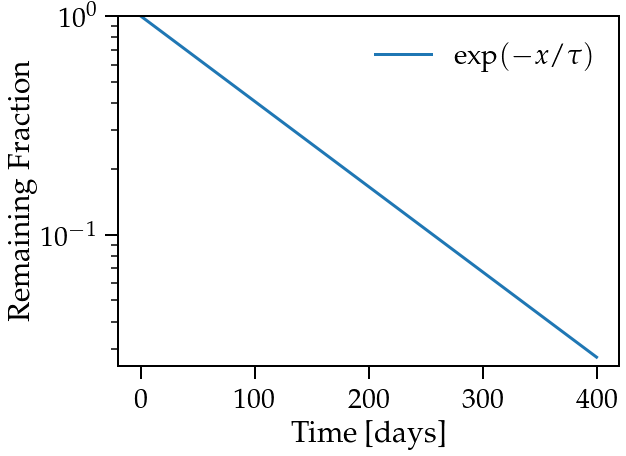

In [7]:
from plot_defaults import *
# let's change the fig size and white space
myfig = pl.figure(figsize=(8,6))
myfig.subplots_adjust(hspace=0,wspace=0)
myfig.subplots_adjust(left=0.12)
myfig.subplots_adjust(bottom=0.16)
myfig.subplots_adjust(top=0.97)
myfig.subplots_adjust(right=0.99)
pl.semilogy(x,y,label="$\exp(-x/\\tau)$")
pl.ylim(0.025,1.0)
# adding labels
pl.xlabel("Time [days]")
pl.ylabel("Remaining Fraction")
# make the ticks thicker
ax = pl.gca()
set_ticklines(ax,2.0,0.75*2.0)
# add a legend
pl.legend(loc="upper right",frameon=False)

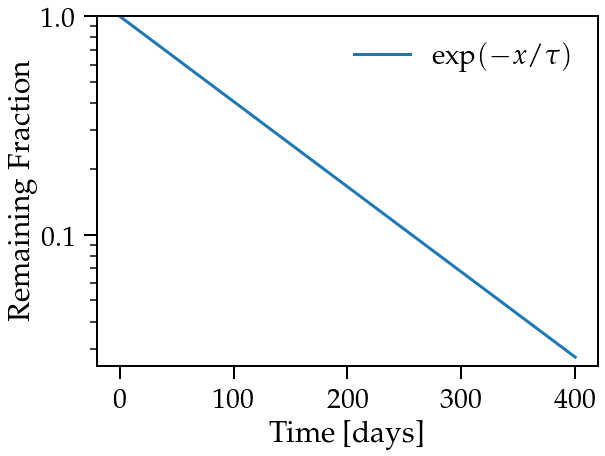

In [8]:
# fixing a tiny annoyance
# let's change the fig size and white space
myfig = pl.figure(figsize=(8,6))
myfig.subplots_adjust(hspace=0,wspace=0)
myfig.subplots_adjust(left=0.12)
myfig.subplots_adjust(bottom=0.16)
myfig.subplots_adjust(top=0.97)
myfig.subplots_adjust(right=0.99)

pl.semilogy(x,y,label="$\exp(-x/\\tau)$")
pl.ylim(0.025,1.0)
# use a "Formatter"
ax = pl.gca()
guender = pl.FormatStrFormatter("%3.1f")
ax.yaxis.set_major_formatter(guender)
# adding labels
pl.xlabel("Time [days]")
pl.ylabel("Remaining Fraction")
# make the ticks thicker
set_ticklines(ax,2.0,0.75*2.0)
# add a legend
pl.legend(loc="upper right",frameon=False)

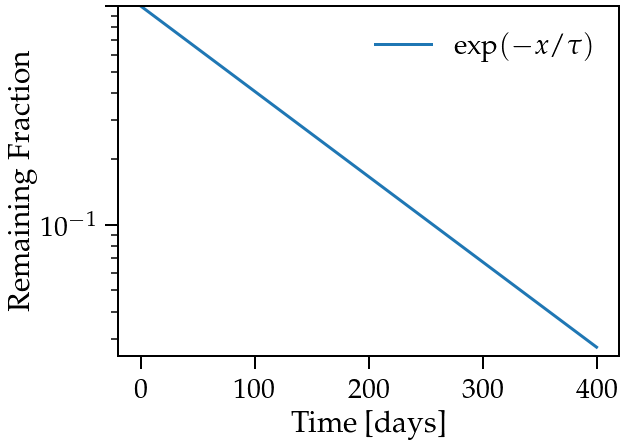

In [11]:
#
# ADVANCED -- just an example

#
# doing even better with formatters: FuncFormatter
# -- make your own functions to format tick labels

myfig = pl.figure(figsize=(8,6))
myfig.subplots_adjust(hspace=0,wspace=0)
myfig.subplots_adjust(left=0.12)
myfig.subplots_adjust(bottom=0.16)
myfig.subplots_adjust(top=0.97)
myfig.subplots_adjust(right=0.99)
pl.semilogy(x,y,label="$\exp(-x/\\tau)$")
pl.ylim(0.025,1.0)



def ScientificNotation2(s):
# transform 1e+004 into 1e4, for example
    tup = s.split('e')
    mantissa = tup[0].rstrip('0').rstrip('.')
    sign = tup[1][0].replace('+', '')
    exponent = tup[1][1:].lstrip('0')
    if(exponent == " "):
        exponent = "0"
    if(mantissa != "1"):
        res = '%se{%s%s}' %(mantissa, sign, exponent)
        return res.replace('e{}','').replace('e',r'{\times}10^')
    else:
        res = '10^{%s%s}' %(sign,exponent)
        return res


def myformatter(x,pos):
    if np.abs(x - 1.0) < 1.0e-14:
        s = "1"
    else:
        s = '%1.4e ' % (x)
        s = ScientificNotation2(s)
        return "${"+s+"}$"

# use a "Formatter"
ax = pl.gca()
guender = pl.FuncFormatter(myformatter)
ax.yaxis.set_major_formatter(guender)
# adding labels
pl.xlabel("Time [days]")
pl.ylabel("Remaining Fraction")

# make the ticks thicker
set_ticklines(ax,2.0,0.75*2.0)
# add a legend
pl.legend(loc="upper right",frameon=False)


# Multi Panel Plots

In [33]:
# let's load our gravitational wave data in
indata = np.loadtxt("bbh_gw.dat",comments="#")
time = indata[:,0]
hp = indata[:,1] / 1.0e-21
hc = indata[:,2] / 1.0e-21

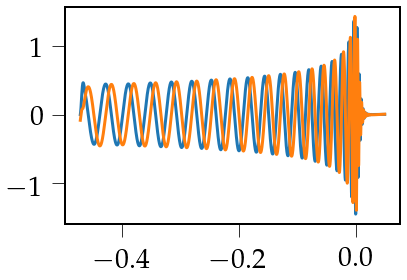

In [34]:
# let's plot strain and amplitude
pl.plot(time,hp)
pl.plot(time,hc)

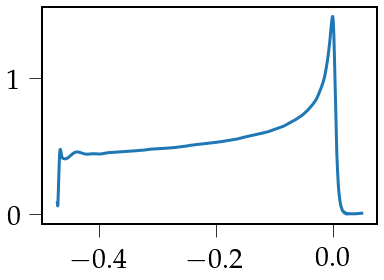

In [35]:
# let's make a second plot for the amplitude
amp = np.sqrt(hp**2 + hc**2)
myfig = pl.figure()
pl.plot(time,amp)

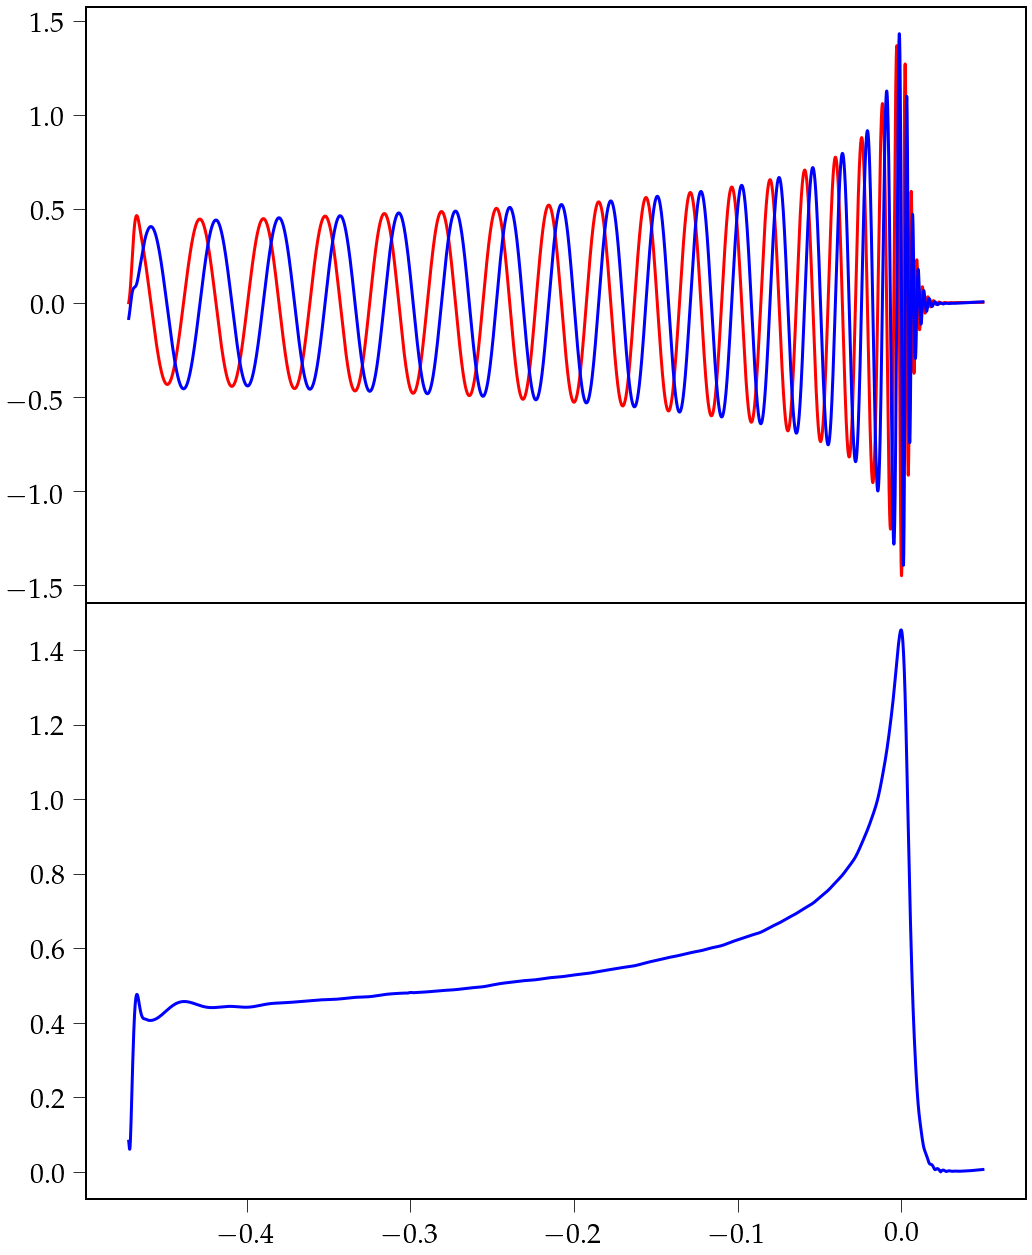

In [36]:
# since the x axes are the same, let's combine them!
#Set up the figure
myfig, (ax1, ax2) = pl.subplots(2, sharex=True, sharey=False, figsize=(15,18))

# note: arguments
# first: number of plots
# second: sharex = True if you want to stack vertically (then sharey = False)
# third: sharey = True if you want to stack horizontally (then sharex = False)
# fourth -- figsize (horizontal, vertical)




myfig.subplots_adjust(hspace=0,wspace=0)
# hspace=0, wspace=0 is important to remove white space between panels
myfig.subplots_adjust(left=0.12)
myfig.subplots_adjust(bottom=0.07)
myfig.subplots_adjust(top=0.99)
myfig.subplots_adjust(right=0.99)


# we now have two panels, described by axis objects ax1 and ax2

# first panel - hp and hc
ax1.plot(time, hp, c='red', label="$h_+$")
ax1.plot(time, hc, c='blue', label="$h_\\times$")

# second panel -- amplitude
ax2.plot(time,amp,c='blue', label='$\sqrt{h_+^2 + h_\\times^2}$')

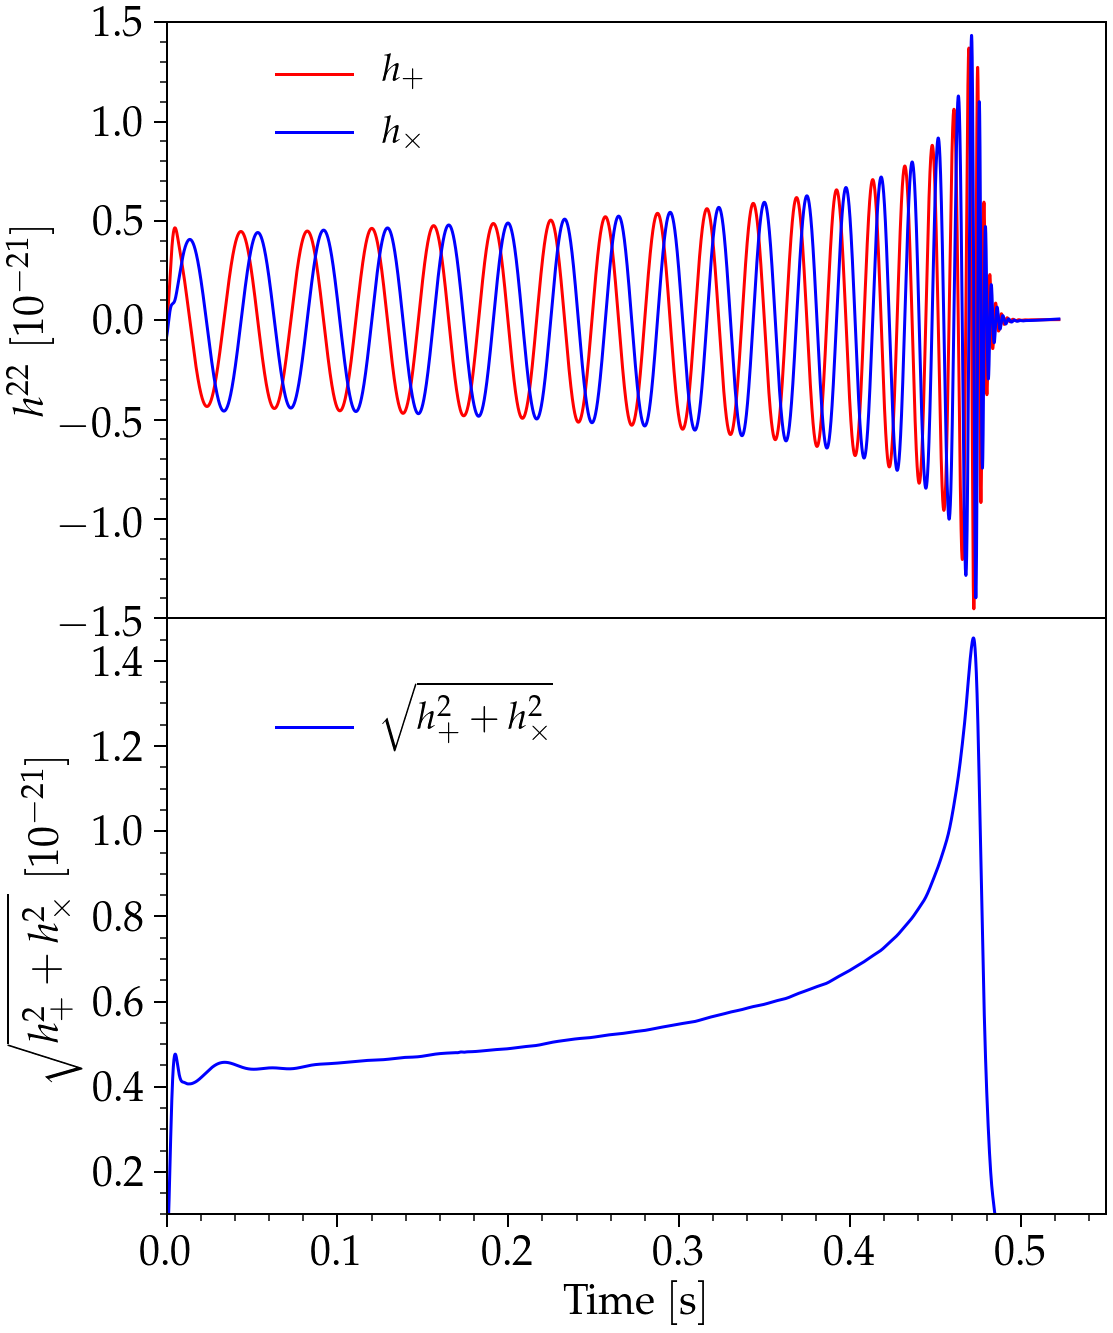

In [37]:
# now beautify!
#
# axes labels
# legends
# font size of tick labels too small
# add minor ticks
# axes ranges


# first, let's have the time start at 0 please
time = time - time[0]


#### begin copied commands
#Set up the figure
myfig, (ax1, ax2) = pl.subplots(2, sharex=True, sharey=False, figsize=(15,18))
myfig.subplots_adjust(hspace=0,wspace=0)
# hspace=0, wspace=0 is important to remove white space between panels
myfig.subplots_adjust(left=0.12)
myfig.subplots_adjust(bottom=0.07)
myfig.subplots_adjust(top=0.99)
myfig.subplots_adjust(right=0.99)


# we now have two panels, described by axis objects ax1 and ax2
# first panel - hp and hc
ax1.plot(time, hp, c='red', label="$h_+$")
ax1.plot(time, hc, c='blue', label="$h_\\times$")
# second panel -- amplitude
ax2.plot(time,amp,c='blue', label='$\sqrt{h_+^2 + h_\\times^2}$')
#### end copied commands
#### new commands



# ranges
ax1.set_ylim(-1.5,1.5)
ax1.set_xlim(0,0.55)
ax2.set_ylim(0.1,1.5)
ax2.set_xlim(0,0.55)

# tick label font size
ax1.yaxis.set_tick_params(labelsize=42)
ax2.yaxis.set_tick_params(labelsize=42)
ax2.xaxis.set_tick_params(labelsize=42)

# tick locators
xminorLocator = pl.MultipleLocator(0.02)
xmajorLocator = pl.MultipleLocator(0.1)

yminorLocator = pl.MultipleLocator(0.1)
ymajorLocator = pl.MultipleLocator(0.5)

ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
ax1.yaxis.set_minor_locator(yminorLocator)
ax1.yaxis.set_major_locator(ymajorLocator)

yminorLocator2 = pl.MultipleLocator(0.05)
ymajorLocator2 = pl.MultipleLocator(0.2)
ax2.yaxis.set_minor_locator(yminorLocator2)
ax2.yaxis.set_major_locator(ymajorLocator2)

# tick lines
set_ticklines(ax1,2.0,0.75*2.0)
set_ticklines(ax2,2.0,0.75*2.0)

# axis labels
ax1.set_ylabel("$h^{22}\,\,[10^{-21}]$",fontsize=42)
ax2.set_ylabel("$\sqrt{h_+^2 + h_\\times^2} \,\,[10^{-21}]$",fontsize=42,labelpad=10)
ax2.set_xlabel("Time $[$s$]$",fontsize=42,labelpad=5)
# legends
ax1.legend(loc=(0.1,0.75),frameon=False,fontsize=38)
ax2.legend(loc=(0.1,0.75),frameon=False,fontsize=38)

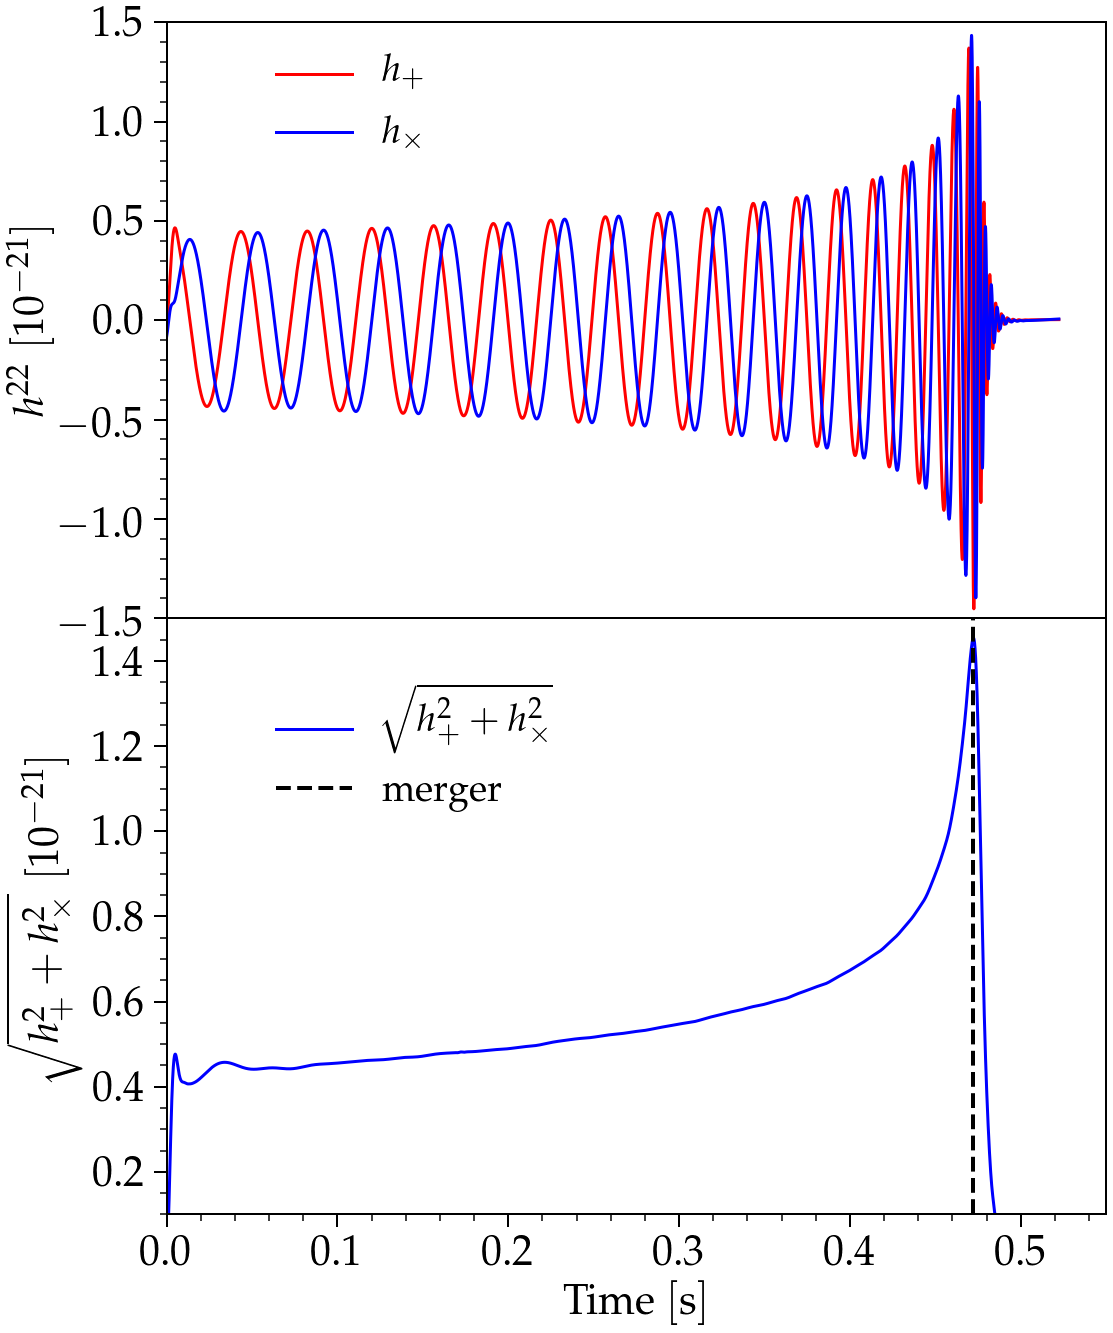

In [38]:
# let's add a vertical line indicating merger
# merger time = time at which amplitude is maximal
tmerge = time[amp.argmax()]
# copy the stuff from above
#### begin copied commands


#Set up the figure
myfig, (ax1, ax2) = pl.subplots(2, sharex=True, sharey=False, figsize=(15,18))
myfig.subplots_adjust(hspace=0,wspace=0)
# hspace=0, wspace=0 is important to remove white space between panels
myfig.subplots_adjust(left=0.12)
myfig.subplots_adjust(bottom=0.07)
myfig.subplots_adjust(top=0.99)
myfig.subplots_adjust(right=0.99)
# we now have two panels, described by axis objects ax1 and ax2
# first panel - hp and hc
ax1.plot(time, hp, c='red', label="$h_+$")
ax1.plot(time, hc, c='blue', label="$h_\\times$")
# second panel -- amplitude
ax2.plot(time,amp,c='blue', label='$\sqrt{h_+^2 + h_\\times^2}$')
#### end copied commands
#### new commands
# ranges
ax1.set_ylim(-1.5,1.5)
ax1.set_xlim(0,0.55)
ax2.set_ylim(0.1,1.5)
ax2.set_xlim(0,0.55)
# tick label font size
ax1.yaxis.set_tick_params(labelsize=42)
ax2.yaxis.set_tick_params(labelsize=42)
ax2.xaxis.set_tick_params(labelsize=42)
# tick locators
xminorLocator = pl.MultipleLocator(0.02)
xmajorLocator = pl.MultipleLocator(0.1)
yminorLocator = pl.MultipleLocator(0.1)
ymajorLocator = pl.MultipleLocator(0.5)
ax1.xaxis.set_major_locator(xmajorLocator)
ax1.xaxis.set_minor_locator(xminorLocator)
ax1.yaxis.set_minor_locator(yminorLocator)
ax1.yaxis.set_major_locator(ymajorLocator)
yminorLocator2 = pl.MultipleLocator(0.05)
ymajorLocator2 = pl.MultipleLocator(0.2)
ax2.yaxis.set_minor_locator(yminorLocator2)
ax2.yaxis.set_major_locator(ymajorLocator2)
# tick lines
set_ticklines(ax1,2.0,0.75*2.0)
set_ticklines(ax2,2.0,0.75*2.0)
# axis labels
ax1.set_ylabel("$h^{22}\,\,[10^{-21}]$",fontsize=42)
ax2.set_ylabel("$\sqrt{h_+^2 + h_\\times^2} \,\,[10^{-21}]$",fontsize=42,labelpad=10)
ax2.set_xlabel("Time $[$s$]$",fontsize=42,labelpad=5)
# now add a line using pl.
ax2.axvline(tmerge, c="black", linewidth=4, zorder=2, linestyle='--', label="merger")
# zorder determines the order in which this line is plotted
# legends
ax1.legend(loc=(0.1,0.75),frameon=False,fontsize=38)
ax2.legend(loc=(0.1,0.65),frameon=False,fontsize=38)


# Interpolation

We will learn interpolation using scipy

In [52]:
import scipy as sp
print(sp.__version__) # print the SciPy version we are using

1.2.1


In [53]:
%matplotlib qt

In [54]:
# let's read in some discrete data!
indata = np.loadtxt("interdata.dat")
time = indata[:,0]
data = indata[:,1]
pl.plot(time,data,"+",markersize=10,markeredgewidth=3)
pl.xlim(0,10)
pl.ylim(4,11.5)

(4, 11.5)

## Simplest case: scipy.interpolate.interp1d

(4, 11.5)

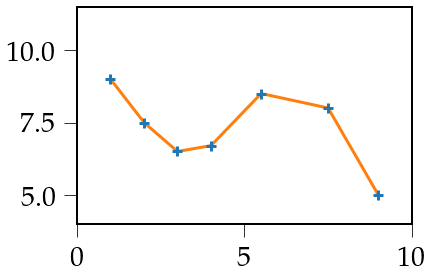

In [28]:
# simplest thing: use scipy.interpolate.interp1d
# linear, quadratic, cubic
from scipy import interpolate as interp

f = interp.interp1d(time,data,kind='linear') # linear is the default

# this creates an interpolation *function*
# We can get new y values by sticking x values into f

xnew = np.linspace(time[0],time[-1],1000)
ynew = f(xnew)
pl.plot(time,data,"+",markersize=10,markeredgewidth=3,zorder=10)
pl.plot(xnew,ynew)
pl.xlim(0,10)
pl.ylim(4,11.5)

(4, 11.5)

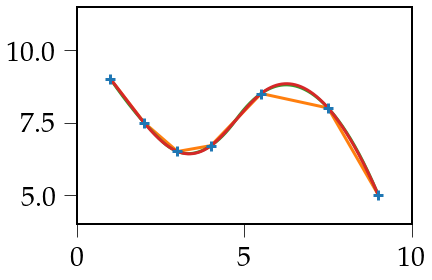

In [29]:
# let's try quadratic and cubic
f = interp.interp1d(time,data,kind='linear') # linear is the default
f2 = interp.interp1d(time,data,kind='quadratic') # quadratic spline
f3 = interp.interp1d(time,data,kind='cubic') # cubic spline


# this creates an interpolation *function*
# We can get new y values by sticking x values into f

xnew = np.linspace(time[0],time[-1],1000)
ynew = f(xnew)
ynew2 = f2(xnew)
ynew3 = f3(xnew)


pl.plot(time,data,"+",markersize=10,markeredgewidth=3,zorder=10)

pl.plot(xnew,ynew)
pl.plot(xnew,ynew2)
pl.plot(xnew,ynew3)
pl.xlim(0,10)
pl.ylim(4,11.5)

##  Simple fitting
There is NumPy and SciPy functionality for curve fitting.

### Polynomial fit with NumPy

(4, 11.5)

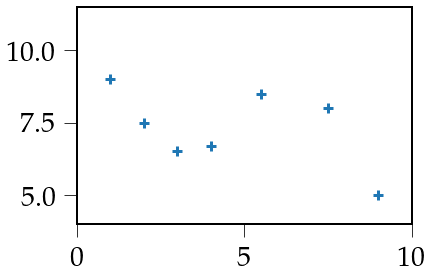

In [41]:
# Let's use our 'observational' data from the interpolation example again
# let's read in some discrete data!
indata = np.loadtxt("interdata.dat")
time = indata[:,0]
data = indata[:,1]
pl.plot(time,data,"+",markersize=10,markeredgewidth=3)
pl.xlim(0,10)
pl.ylim(4,11.5)

numpy.polyfit(x,y,order) will carry out a polynomial least-squares fit of the data.

In [58]:
# linear
myfit = np.polyfit(time,data,1)

print(myfit)

xnew = np.linspace(time[0],time[-1],100)
ynew = xnew*myfit[0] + myfit[1]

pl.plot(time,data,"+",markersize=10,markeredgewidth=3)
pl.plot(xnew,ynew)

pl.xlim(0,10)
pl.ylim(4,11.5)

[-0.23444909  8.386053  ]


(4, 11.5)

That's so bad! let's try quadratic now!

In [60]:
 # quadratic
myfit = np.polyfit(time,data,2)
print(myfit)
xnew = np.linspace(time[0],time[-1],100)
ynew = myfit[0]*xnew**2 + myfit[1]*xnew + myfit[2]
pl.plot(time,data,"+",markersize=10,markeredgewidth=3)
pl.plot(xnew,ynew)
pl.xlim(0,10)
pl.ylim(4,11.5)

[-0.02799905  0.04677148  7.89044639]


(4, 11.5)

In [59]:
# cubic
myfit = np.polyfit(time,data,3)
print(myfit)
xnew = np.linspace(time[0],time[-1],100)
ynew = myfit[0]*xnew**3 + myfit[1]*xnew**2 + myfit[2]*xnew + myfit[3]
# here is a simply way of constructing the polynomial:
# use numpy.poly1d object!
f = np.poly1d(myfit)
ynew = f(xnew)
pl.plot(time,data,"+",markersize=10,markeredgewidth=3)
pl.plot(xnew,ynew)
pl.xlim(0,10)
pl.ylim(4,11.5)

[-0.08201642  1.18471336 -4.90271655 12.90625897]


(4, 11.5)

### Fitting with SciPy
scipy.optimize.curv_fit will fit any specified function f to data.
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.curve_fit.html

(4, 11.5)

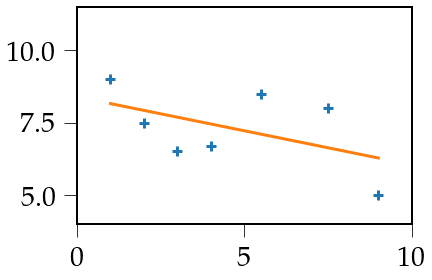

In [46]:
from scipy.optimize import curve_fit

def fitfunc(x,a,b):
    return a*x + b

popt, pcov = curve_fit(fitfunc, time, data)

# popt contains the optimized parameters
# pconv is a 2D array containing the estimated covariance of popt
# since we are using a polynomial, we can generate
# data easily

f = np.poly1d(popt)

xnew = np.linspace(time[0],time[-1],100)
ynew = f(xnew)

pl.plot(time,data,"+",markersize=10,markeredgewidth=3)
pl.plot(xnew,ynew)


pl.xlim(0,10)
pl.ylim(4,11.5)



(4, 11.5)

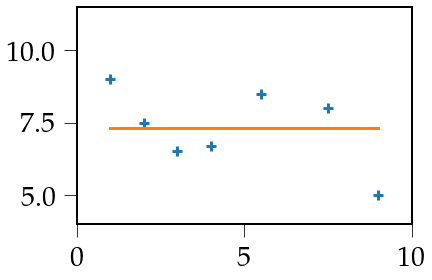

In [49]:
from scipy.optimize import curve_fit

# example: fit a constant

def fitfunc(x,b):
    return b

popt, pcov = curve_fit(fitfunc, time, data, )
# popt contains the optimized parameters
# pconv is a 2D array containing the estimated covariance of popt
# since we are using a polynomial, we can generate
# data easily

f = np.poly1d(popt)

xnew = np.linspace(time[0],time[-1],100)
ynew = f(xnew)

pl.plot(time,data,"+",markersize=10,markeredgewidth=3)
pl.plot(xnew,ynew)
pl.xlim(0,10)
pl.ylim(4,11.5)

## Root Finding

Root finding functions are provided by scipy.optimize.

We will use as a simple example the Newton-Raphson method.



\begin{equation*}
x_{n+1} = x_{n} − f(x_{n})/f^'(x_{n})
\end{equation*}

https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.newton.html
SciPy offers a range of other methods: Brent, Bisection, and multi-D variants.

In [51]:
from scipy.optimize import newton

# a simple example
def f(x):
    return x**3 - 3
# note that it is also possible to pass additional arguments

# to the function. See the documentation.
# x0 is the initial guess
x0 = 100.0
zero = newton(f,x0)
print(zero)


1.4422495703074087


# Fourier Transforms and one application








In gravitational wave (GW) physics, we are often interested in the frequency spectrum of a GW
signal. Both amplitude and power spectra are often used.
We define the forward Fourier transform of a function h(t) into the frequency domain as:

\begin{equation}
\widetilde{h(f)}=\int_{-\infty}^{\infty} dt h(t) exp(- 2 \pi i f t)
\end{equation}

It can be shown that the energy spectrum of such a signal is given by

\begin{equation}
\frac{dE_{GW}(f)}{df} = \frac{2}{15} \frac{c^3}{G} D^2 (2 \pi f)^2 |\tilde{h(f)}|^2
\end{equation}

where D is the distace to the source

In [65]:
# let's do this by example
# read in some interesting GW data
indata = np.loadtxt("A634w5.50_LS220_A.dat",comments="#")
D = 3.086e22 # distance: 10 kpc
convfac = 1.0/8.0 * np.sqrt(15.0/np.pi) # code-internal conversion factor, don't worry
time = indata[:,0] / 1000.0 # to get time in seconds
h = indata[:,1] / D * convfac # put the source at

In [66]:
myfig = pl.figure(figsize=(16,9))
pl.plot(time,h)
# this is data from a rotating stellar core collapse

For our Fourier transform, we will be using the Fast-Fourier Transform algorithm, imple-
mented in SciPy. This requires that we resample the data to constant time spacing and a lenght
that is a multiple of two. In principle, we also need to window the data so that both ends are zero.

In [69]:
#first, resample:
# we'll sample at 16384 Hz, which is the LIGO sampling rate
rate = 16348
# so time step is
dt = 1.0/rate
# duration
duration = time[-1] - time[0]
# number of points
npoints = np.int(np.trunc(duration/dt))
# adjust if odd
if npoints % 2 > 0:
    npoints -= 1
# now create a new equidistant time array
tnew = np.linspace(time[0],time[0]+(npoints-1)*dt,npoints)
from scipy import interpolate as interp
# use spline interpolation to fill a new h array
tck = interp.splrep(time,h,s=0)
hnew = interp.splev(tnew,tck)
# now we've equidistant data, let's window them
# let's use a Hamming window centered on the peak of the waveform

In [76]:
#ipeak = np.abs(hnew).argmax()
# make the window 50 ms wide (so +- 25 ms)
#width = np.int(np.trunc(0.07/dt))
#from scipy import signal
#window = signal.hamming(width)
# now fit this window into an array of zeros of length len(hnew)
#zwindow = np.zeros(len(hnew))
# now replace the window part
#imin = ipeak - width//2 - 1
#imax = ipeak + width//2
#zwindow[imin:imax] = window[:]


# now multiply window and hnew
hnew_windowed = hnew[:] #* zwindow[:]
# now do the Fourier transform
from scipy import fftpack
fftres = fftpack.fft(hnew_windowed)
# get frequencies
freqs = fftpack.fftfreq(npoints,d=dt)
# use only positive frequencies and normalize units
fftres = fftres[1:npoints//2]
freqs = freqs[1:npoints//2]
normalization = dt
fftres = fftres * normalization
#print(len(freqs),len(fftres))
#print(rate,rate//2)
# go to GW energy
ggrav = 6.6726e-8
clite = 2.99792458e10
msun = 1.99e33
fac = 2.0/15.0 * clite**3 / ggrav * D**2
dEgwdf = fac * (2.0*np.pi*freqs**2) * np.abs(fftres)**2 / (msun * clite**2)
pl.plot(freqs,dEgwdf)
pl.xlim(0,3000)
pl.ylim(1.0e-16,1.5e-11)

(1e-16, 1.5e-11)